<a href="https://colab.research.google.com/github/rokshana10/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df = pd.read_csv('https://projects.fivethirtyeight.com/soccer-api/club/spi_global_rankings.csv')

In [86]:
df.head()

,rank,prev_rank,name,league,off,def,spi
0,1,1,Manchester City,Barclays Premier League,3.16,0.21,94.80
1,2,2,Bayern Munich,German Bundesliga,3.50,0.38,94.44
2,3,3,Liverpool,Barclays Premier League,2.87,0.31,91.91
3,4,4,Barcelona,Spanish Primera Division,2.90,0.43,90.33
4,5,5,Real Madrid,Spanish Primera Division,2.67,0.37,89.49


In [87]:
df['prev_rank_class'] = df['prev_rank'].map({1:'first', 2:'second', 3:'third'})
df[['prev_rank', 'prev_rank_class']].sample(5)

,prev_rank,prev_rank_class
376,377,NaN
307,307,NaN
49,50,NaN
66,68,NaN
282,269,NaN


In [88]:
df['prev_rank_class'] = df['prev_rank'].map({1:'first', 2:'second', 3:'third'})
df[['prev_rank', 'prev_rank_class']].head(5)

,prev_rank,prev_rank_class
0,1,first
1,2,second
2,3,third
3,4,NaN
4,5,NaN


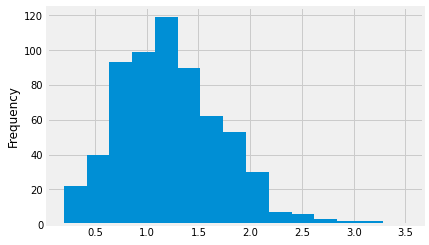

In [89]:
# Histogram

df['off'].plot(kind='hist', bins=15)

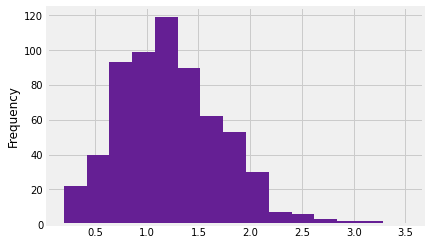

In [90]:
df = df[df['off']<500]
df['off'].plot(kind='hist', bins=15, color='#651f94');

In [91]:
df.columns

Index(['rank', 'prev_rank', 'name', 'league', 'off', 'def', 'spi',
       'prev_rank_class'],
      dtype='object')

In [92]:
# A continuous variable can be converted to a categorical variable
df['off'].describe()

count    629.000000
mean       1.233816
std        0.503371
min        0.200000
25%        0.870000
50%        1.190000
75%        1.540000
max        3.500000
Name: off, dtype: float64

In [0]:
# Define some variable
offbins = [0.20, 0.80, 1.19, 1.549, 3.50]
offlabels = ['low', 'medium', 'high', 'vhigh']

In [94]:
# Apply those
df['off_groups'] = pd.cut(df['off'], bins=offbins, labels=offlabels)
df['off_groups'].value_counts().sort_index()

low       124
medium    189
high      155
vhigh     156
Name: off_groups, dtype: int64

In [0]:
# Plot these off group
myresults = df['off_groups'].value_counts().sort_index()

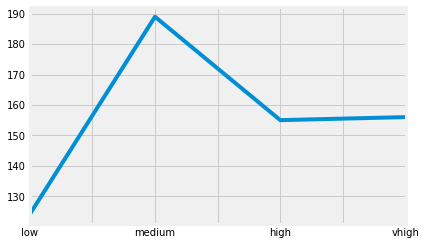

In [96]:
myresults.plot()

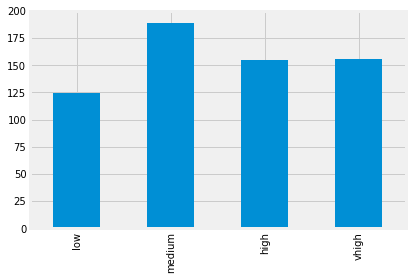

In [97]:
myresults.plot(ylim = (0, 200), kind='bar');

In [98]:
df['def'].describe()

count    629.000000
mean       1.439730
std        0.446457
min        0.210000
25%        1.130000
50%        1.430000
75%        1.750000
max        2.640000
Name: def, dtype: float64

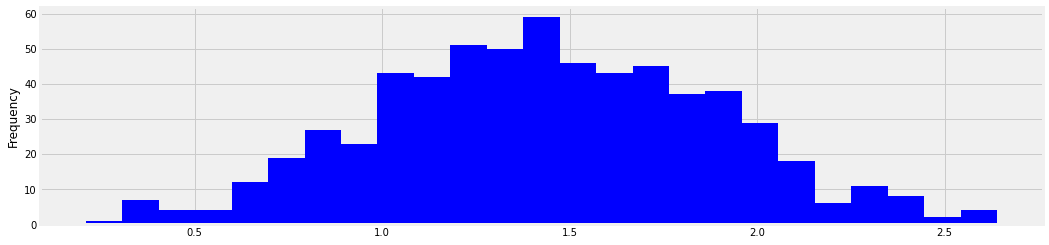

In [99]:
df['def'].plot(kind='hist', bins=25, color='blue', figsize=(16,4));

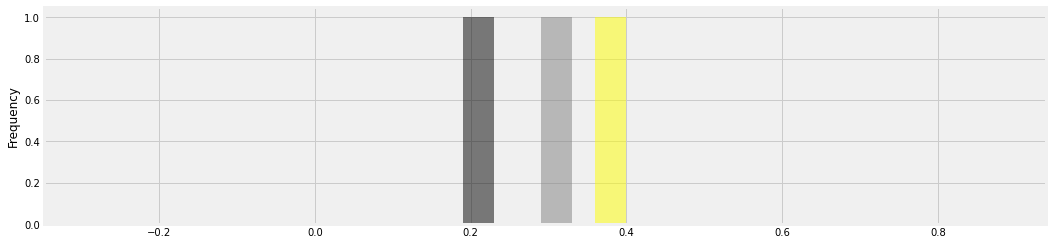

In [100]:
# Histogram of continuous variable, broken out by categorical variable
df[df['prev_rank_class']=='first']['def'].plot(kind='hist', bins=25, color='black', figsize=(16,4), alpha=0.5);
df[df['prev_rank_class']=='second']['def'].plot(kind='hist', bins=25, color='yellow', figsize=(16,4), alpha=0.5);
df[df['prev_rank_class']=='third']['def'].plot(kind='hist', bins=25, color='gray', figsize=(16,4), alpha=0.5);

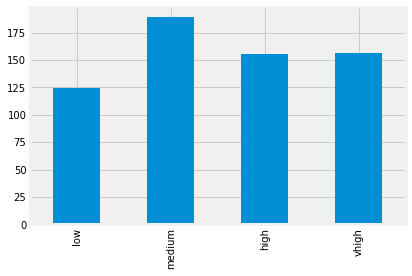

In [101]:
# Bar chart
df['off_groups'].value_counts().sort_index().plot(kind='bar')

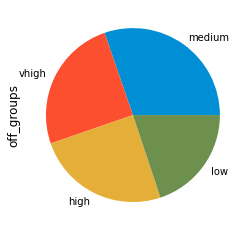

In [102]:
# Pie chart
df['off_groups'].value_counts().plot(kind='pie', figsize=(4,4));

In [0]:
# Two categorical variables using crosstab
cab_death = pd.crosstab(df['prev_rank_class'], df['rank'])

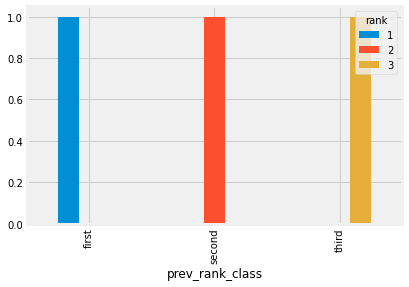

In [104]:
# Bar chart.
cab_death.plot(kind='bar');

In [105]:
# Crosstab with column percents.
cab_death1 = pd.crosstab(df['prev_rank_class'], df['rank'], normalize='index')
cab_death1

rank,1,2,3
prev_rank_class,,,
first,1.0,0.0,0.0
second,0.0,1.0,0.0
third,0.0,0.0,1.0


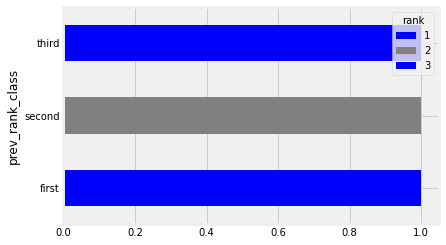

In [106]:
# Bar chart, for easy comparison of two categorical variables.
cab_death1.plot(kind='barh', stacked=True, color=['blue', 'gray'])

In [107]:
df['def'].mean()

1.4397297297297291

In [108]:
df.groupby('prev_rank_class')['def'].mean()

prev_rank_class
first     0.21
second    0.38
third     0.31
Name: def, dtype: float64

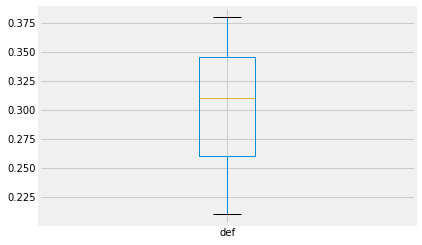

In [109]:
df.groupby('prev_rank_class')['def'].mean().plot(kind='box');

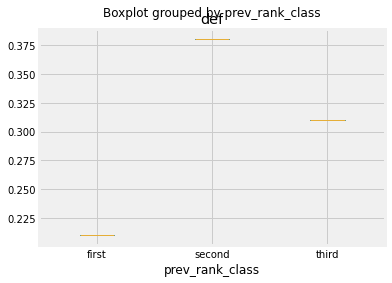

In [110]:
# Boxplot
df.boxplot(column='def', by='prev_rank_class')

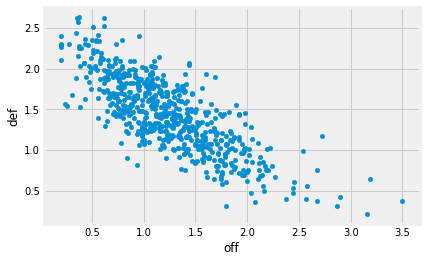

In [111]:
# Two continuous variables: off by def
df.plot(kind='scatter', x='off' , y='def');

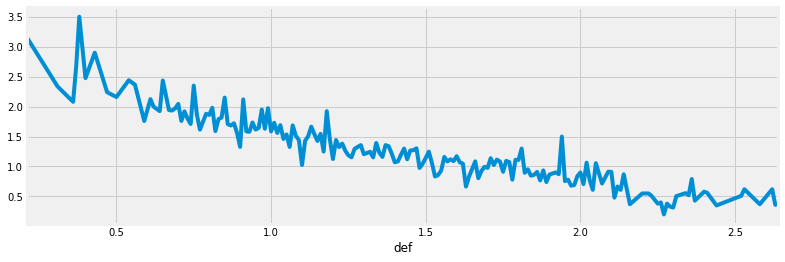

In [112]:
# line chart: def by off
df.groupby('def')['off'].mean().plot(figsize=(12,4));

In [113]:
# Correlation
df.corr()

,rank,prev_rank,off,def,spi
rank,1.000000,0.999699,-0.920779,0.910588,-0.983296
prev_rank,0.999699,1.000000,-0.920823,0.910027,-0.983057
off,-0.920779,-0.920823,1.000000,-0.781659,0.952009
def,0.910588,0.910027,-0.781659,1.000000,-0.923962
spi,-0.983296,-0.983057,0.952009,-0.923962,1.000000


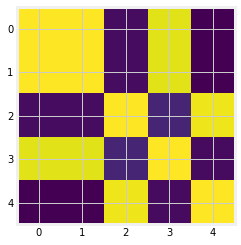

In [114]:
plt.imshow(df.corr());

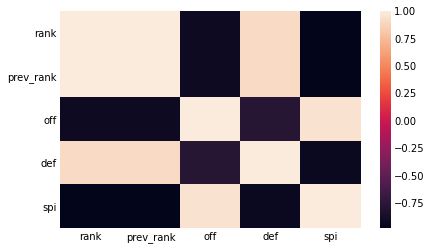

In [115]:
# Seabone
sns.heatmap(df.corr())

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

In [117]:
df3 = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
display(example)

In [0]:
plt.style.available
plt.style.use('fivethirtyeight')

In [0]:
fakelist=[38, 3, 2, 1, 2, 4, 6, 5, 5, 33]

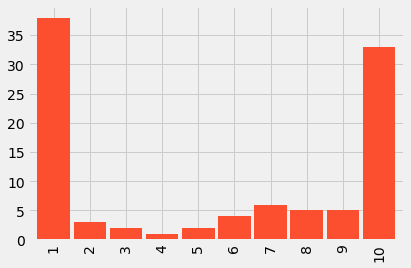

In [120]:
fakeseries = pd.Series(fakelist, index=range(1,11))
fakeseries.plot.bar(color='C1', width=0.9);

In [0]:
fakelist2=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1,1,1,1,1,1,1,1,1,1,1,1,1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


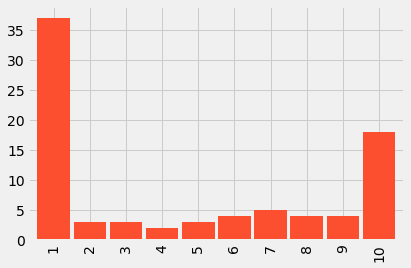

In [122]:
fakeseries2 = pd.Series(fakelist2)
fakeseries2.value_counts().sort_index().plot.bar(color='C1', width=0.9)

In [123]:
df538 = pd.read_csv('https://projects.fivethirtyeight.com/soccer-api/club/spi_matches.csv')
df538.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,0.91,2.36,32.4,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,1.82,0.86,53.7,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,1.16,1.24,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,1.35,1.14,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,1.47,1.38,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05


In [124]:
df538['date_year'] = pd.to_datetime(df538['date'])
df538[['date', 'date_year']].head()

,date,date_year
0,2016-08-12,2016-08-12
1,2016-08-12,2016-08-12
2,2016-08-13,2016-08-13
3,2016-08-13,2016-08-13
4,2016-08-13,2016-08-13


In [125]:
df538.set_index('date_year', inplace=True)
df538.drop('date', axis=1, inplace=True)
df538.head()

,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
date_year,,,,,,,,,,,,,,,,,,,,,
2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,0.91,2.36,32.4,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05
2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,1.82,0.86,53.7,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10
2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,1.16,1.24,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,1.35,1.14,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,1.47,1.38,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05


In [126]:
df538.tail()

,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
date_year,,,,,,,,,,,,,,,,,,,,,
2020-12-06,2105,Brasileiro Série A,Atlético Goianiense,Coritiba,38.90,41.08,0.4692,0.2870,0.2438,1.60,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-06,2105,Brasileiro Série A,Bahía,Santos,48.12,61.02,0.3586,0.3800,0.2614,1.27,1.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-06,2105,Brasileiro Série A,Bragantino,Grêmio,43.00,65.63,0.2652,0.5077,0.2272,1.25,1.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-06,2105,Brasileiro Série A,Ceará,Botafogo,46.29,40.50,0.5528,0.1984,0.2489,1.58,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-06,2105,Brasileiro Série A,Internacional,Corinthians,55.90,55.51,0.4956,0.2537,0.2507,1.56,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
